# Check Environment

In [1]:
# Install library
#! pip install git+https://github.com/serafi1204/Photographic_mosaic.git
#! pip install lpips

# Download Dataset file
#! gdown --id 1XSklUJZvBvpSUWnk9Aow2SVeppgOHGNW --output dataset.npz
#! gdown --id 1XSklUJZvBvpSUWnk9Aow2SVeppgOHGNW --output dataset.npz

In [2]:
# import library
import photographic_mosaic as pm

import os
import cv2
import numpy as np
import torch

import matplotlib.pyplot as plt

# Define upload, download function
plot = lambda img : plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

try: 
    device = 'colab'
    
    from google.colab import files
    
    upload = lambda : files.list(files.upload().keys())[0]
    download = files.download

except:
    device = 'others'

    upload = lambda : 'target.png'#input("Type file path: ")
    download = lambda filename : print(f"Check '{os.getcwd()}/{filename}'")

# plot
print(device)

others


# Main

## STEP 0: Hyperparameter

In [3]:
# You can modify this parameters
USE_PRECALCULATED_MAP = True
DATASET_FILENAME  = 'dataset.npz'
SOURCE_FILENAME = 'source.npz'

MOSAIC_MAP_FILENAME = 'mosaic_map.npz'
MOSAIC_RESOLUTION = (2, 2)

OUTPUT_FILENAME = 'mosaic_output.png'
OUTPUT_ORIGIN = False

In [4]:
MOSAIC_SIZE = pm.MOSAIC_SIZE
SOURCE_SIZE = pm.SOURCE_SIZE

OUTPUT_SOURCE = SOURCE_FILENAME if OUTPUT_ORIGIN else DATASET_FILENAME

LABEL_COLOR = (
    [255, 0, 0],    # hane 
    [0, 255, 255],  # kimate
    [0, 0, 255],    # onharu
    [0, 255, 0]     # otonosori
)

## STEP 1: Upload Target Image

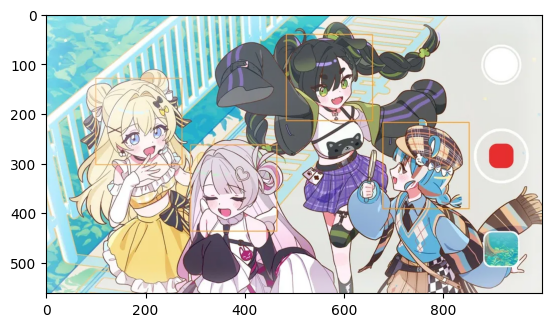

In [5]:
target = np.asarray(cv2.imread(upload()))

# plot
plot(target)

## STEP 2: Generate Mosaic map


[[0. 0.]
 [0. 0.]]


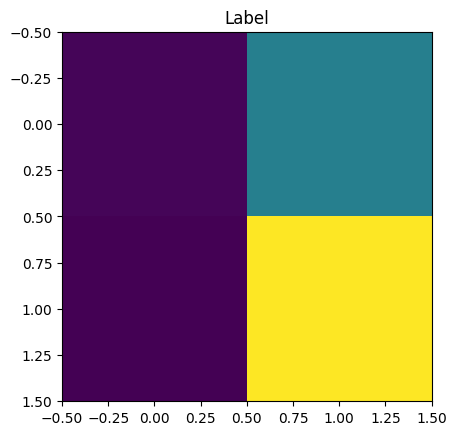

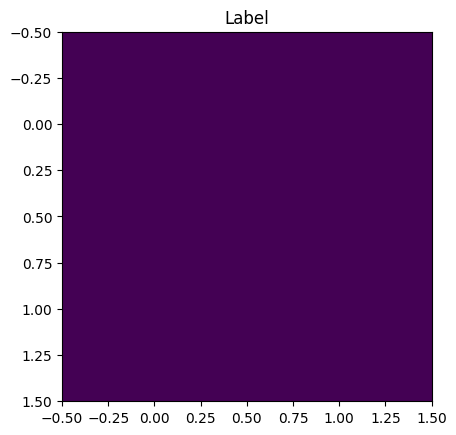

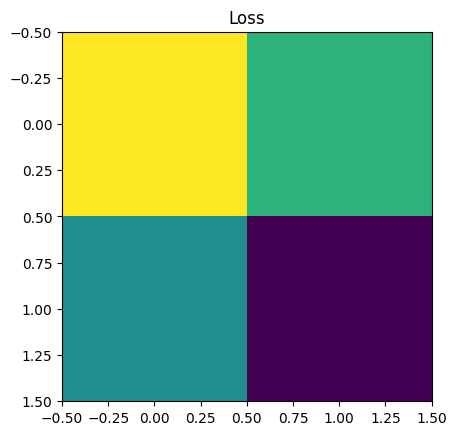

In [6]:
if (USE_PRECALCULATED_MAP):
    precalculated = np.load(MOSAIC_MAP_FILENAME)
    mosaic_map = precalculated['mosaic_map']
    label_map = precalculated['label_map']
    loss_map = precalculated['loss_map']

else:
    mosaic_map, label_map, loss_map = pm.makeMosaicMap(
        target = target, 
        source = DATASET_FILENAME,
        resolution = MOSAIC_RESOLUTION,
        label_color = LABEL_COLOR
    )

# save
np.savez_compressed(MOSAIC_MAP_FILENAME, mosaic_map=mosaic_map, label_map=label_map, loss_map=loss_map)

print(label_map)
# plot
plt.imshow(mosaic_map); plt.title('Label'); plt.show()
plt.imshow(label_map); plt.title('Label'); plt.show()

loss_norm = loss_map*255
plt.imshow(loss_norm); plt.title('Loss'); plt.show()

## STEP 3: Assamble Photographic Mosaic

KeysView(NpzFile 'dataset.npz' with keys: label, data)
Check 'c:\Users\SERAFI\Desktop\PROJECT\Hane\Photographic mosaic/mosaic_output.png'
(48, 96, 3)


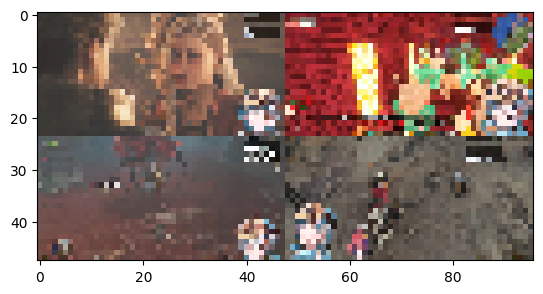

In [7]:
mosaic_output = pm.assamble(
    mosaic_map = mosaic_map,
    source = OUTPUT_SOURCE
)

# Save
cv2.imwrite(OUTPUT_FILENAME, mosaic_output)
download(OUTPUT_FILENAME)

# plot
print(mosaic_output.shape)
plot(mosaic_output)